**Operações morfológicas**

Buscam melhorar a qualidade das imagens.

Erosão: Diminui a área do objeto.

Dilatação: Aumenta a área do objeto.

**Abertura:** Erosão depois dilatação.

**Fechamento:** Dilatação depois erosão.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

from google.colab import drive

drive.mount('/content/gdrive')

!cp -R /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/imagens imagens/ 

Mounted at /content/gdrive


In [2]:
def mostrar_imagem(imagem):
  fig = plt.gcf() # Limpa as configurações do gráfico
  fig.set_size_inches(18, 6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

In [3]:
img = cv2.imread('/content/imagens/moedas02.jpg')

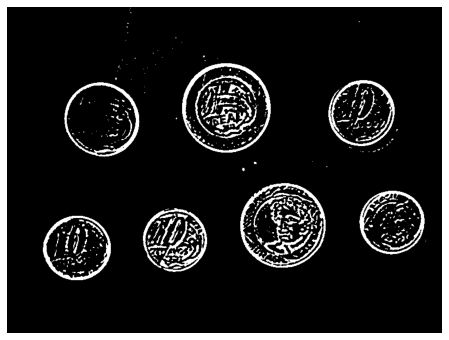

In [4]:
img_processada = img.copy()
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

desfoque = cv2.GaussianBlur(imgCinza, (7,7), 0) # Diminui o ruído
adapt_gauss = cv2.adaptiveThreshold(desfoque, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
mostrar_imagem(adapt_gauss)

In [5]:
# Aplicando a operação da abertura: erosão > dilatação
kernel = np.ones((3,3), np.uint8)

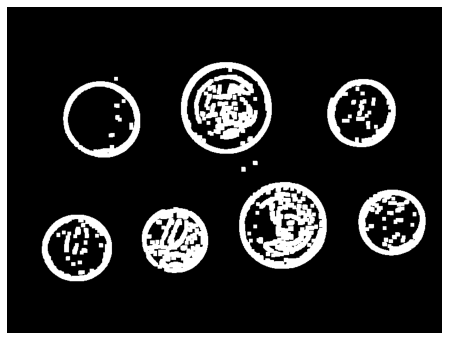

In [9]:
erosao = cv2.erode(adapt_gauss, kernel)
dilatacao = cv2.dilate(erosao, kernel, iterations = 3 # Quantas vezes a operação será executada, enfatiza as bordas dos objetos
                       )
mostrar_imagem(dilatacao)

In [10]:
elementos = dilatacao.copy()
contornos, hierarquia = cv2.findContours(elementos, cv2.RETR_EXTERNAL # Indica que serão retornados apenas os contornos externos das imagens
                                        , cv2.CHAIN_APPROX_SIMPLE) # Procura os contornos dos objetos

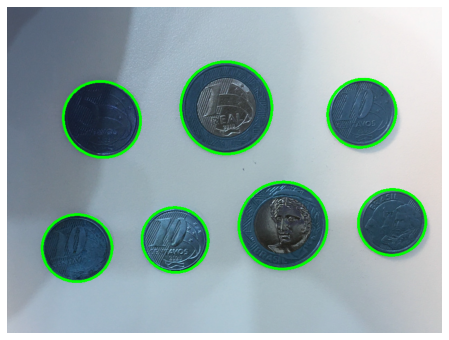

In [14]:
img_processada = img.copy()
for contorno in contornos:
  area = cv2.contourArea(contorno)
  if area >= 1000:
    elipse = cv2.fitEllipse(contorno)
    cv2.ellipse(img_processada, elipse, (0,255,0),3)
mostrar_imagem(img_processada)

**Sobreposição com limiar adaptativo**

Outra forma de visualização

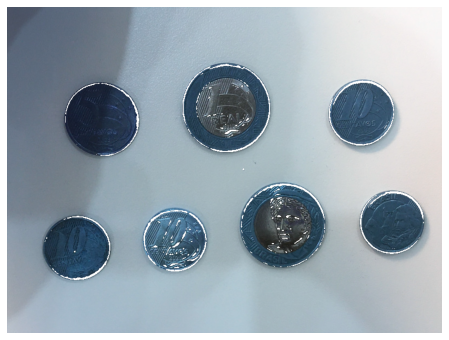

In [16]:
adapt_gauss = cv2.adaptiveThreshold(desfoque, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 11)
sobrepor = cv2.add(img, cv2.cvtColor(adapt_gauss, cv2.COLOR_GRAY2BGR)) # Soma as duas imagens
mostrar_imagem(sobrepor)